In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# 1. Reading in data

## Read in true annotations

In [8]:
filenames <- list.files('annotations-true/')

In [9]:
f <- filenames[1]

sub_vid <- unlist(strsplit(as.character(strsplit(f,split = '.csv')),split='_'))

test_data <- read.csv(paste('annotations-true/',f,sep = ''))

test_data$sub <- rep(sub_vid[2])
test_data$vid <- rep(sub_vid[4])

In [10]:
for(f in filenames[2:length(filenames)]){

    sub_vid <- unlist(strsplit(as.character(strsplit(f,split = '.csv')),split='_'))
    
    sub_data <-  read.csv(paste('annotations-true/',f,sep = ''))
    
    sub_data$sub <- rep(sub_vid[2])
    sub_data$vid <- rep(sub_vid[4])
    
    test_data <- rbind(test_data, sub_data)
}

In [11]:
write.csv(test_data,'test_data.csv')

In [22]:
test_data <- read_csv('test_data.csv')

New names:
• `` -> `...1`
Rows: 144240 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): ...1, time, valence, arousal, sub, vid

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Read in model predictions

In [42]:
unique(test_data$vid)

[1]  1 10 11 13 14 18 20  9

In [7]:
filenames <- list.files('EPiC/results/scenario_1/test//annotations/')

In [15]:
f <- filenames[1]

sub_vid <- unlist(strsplit(as.character(strsplit(f,split = '.csv')),split='_'))

pred_data <- read.csv(paste('EPiC/results/scenario_1/test//annotations/',f,sep = ''))

pred_data$sub <- rep(sub_vid[2])
pred_data$vid <- rep(sub_vid[4])

In [16]:
for(f in filenames[2:length(filenames)]){

    sub_vid <- unlist(strsplit(as.character(strsplit(f,split = '.csv')),split='_'))
    
    sub_data <-  read.csv(paste('EPiC/results/scenario_1/test//annotations/',f,sep = ''))
    
    sub_data$sub <- rep(sub_vid[2])
    sub_data$vid <- rep(sub_vid[4])
    
    pred_data <- rbind(pred_data, sub_data)
}

In [17]:
write.csv(pred_data,'predicted_data.csv')

# 2. Plot dynamics of actual and predicted ratings per video

In [25]:
test_data <- test_data %>%
    gather(metric, true_value,valence:arousal) %>%
    select(time:true_value)

In [27]:
pred_data <- pred_data %>%
    gather(metric, pred_value,valence:arousal) %>%
    select(time:pred_value)

In [28]:
data <- merge(test_data, pred_data, by = c('time','sub','vid','metric'))

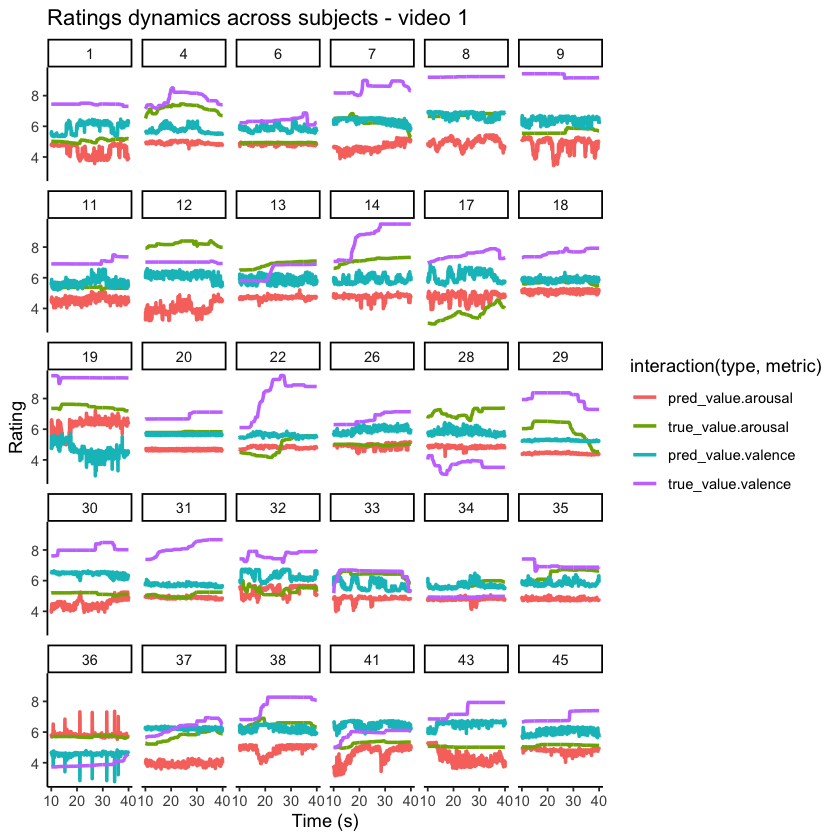

In [39]:
data %>%
    gather(type, value, true_value, pred_value) %>%
    filter(vid == 1) %>%
    ggplot(aes(x=time/1000, y = value, color = interaction(type,metric))) +
        geom_line(size=1) +
        theme_classic() + 
        facet_wrap(~sub) + 
         xlab('Time (s)') +
        ylab('Rating') + 
        ggtitle('Ratings dynamics across subjects - video 1')

ggsave('Plots/pred_eval/vid1.png',dpi=500, width = 10, height = 8)

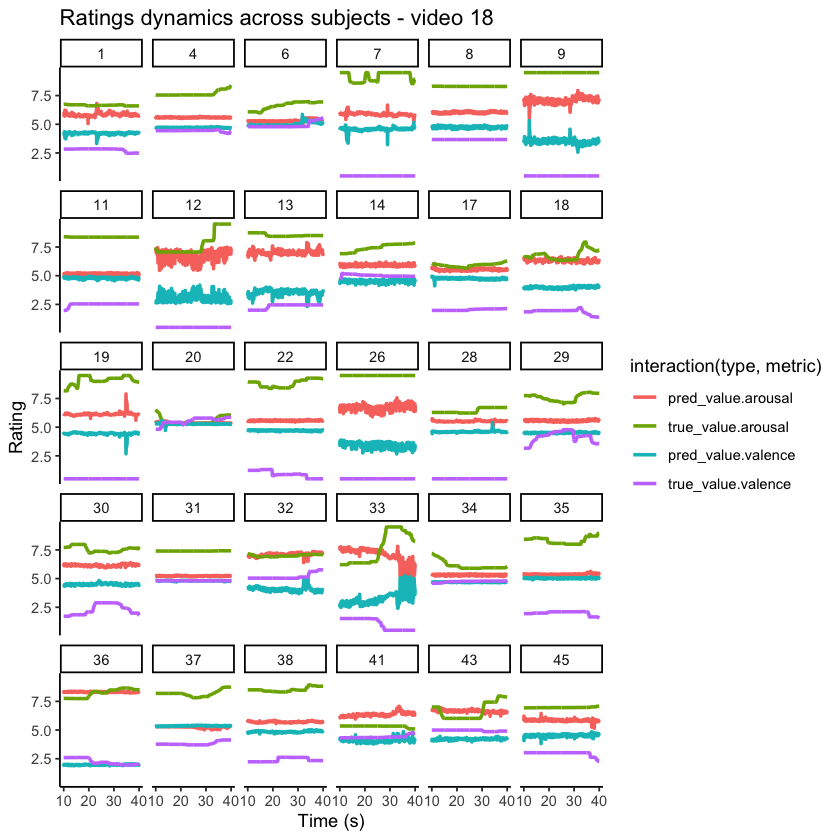

In [40]:
data %>%
    gather(type, value, true_value, pred_value) %>%
    filter(vid == 18) %>%
    ggplot(aes(x=time/1000, y = value, color = interaction(type,metric))) +
        geom_line(size=1) +
        theme_classic() + 
        facet_wrap(~sub) + 
         xlab('Time (s)') +
        ylab('Rating') + 
        ggtitle('Ratings dynamics across subjects - video 18')

ggsave('Plots/pred_eval/vid18.png',dpi=500, width = 10, height = 8)

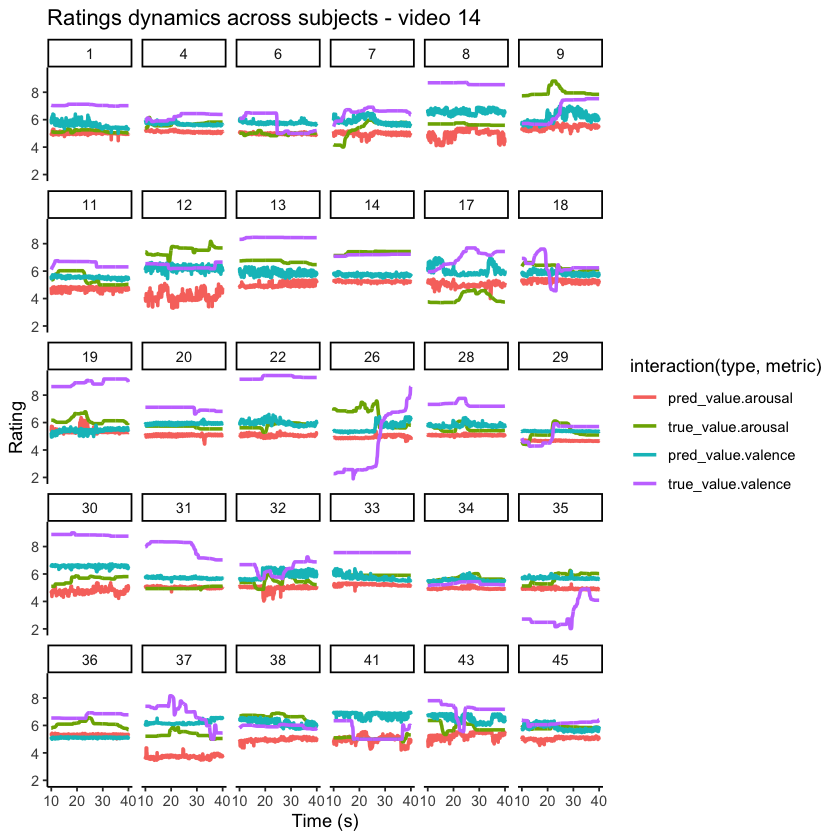

In [41]:
data %>%
    gather(type, value, true_value, pred_value) %>%
    filter(vid == 14) %>%
    ggplot(aes(x=time/1000, y = value, color = interaction(type,metric))) +
        geom_line(size=1) +
        theme_classic() + 
        facet_wrap(~sub) + 
         xlab('Time (s)') +
        ylab('Rating') + 
        ggtitle('Ratings dynamics across subjects - video 14')

ggsave('Plots/pred_eval/vid14.png',dpi=500, width = 10, height = 8)

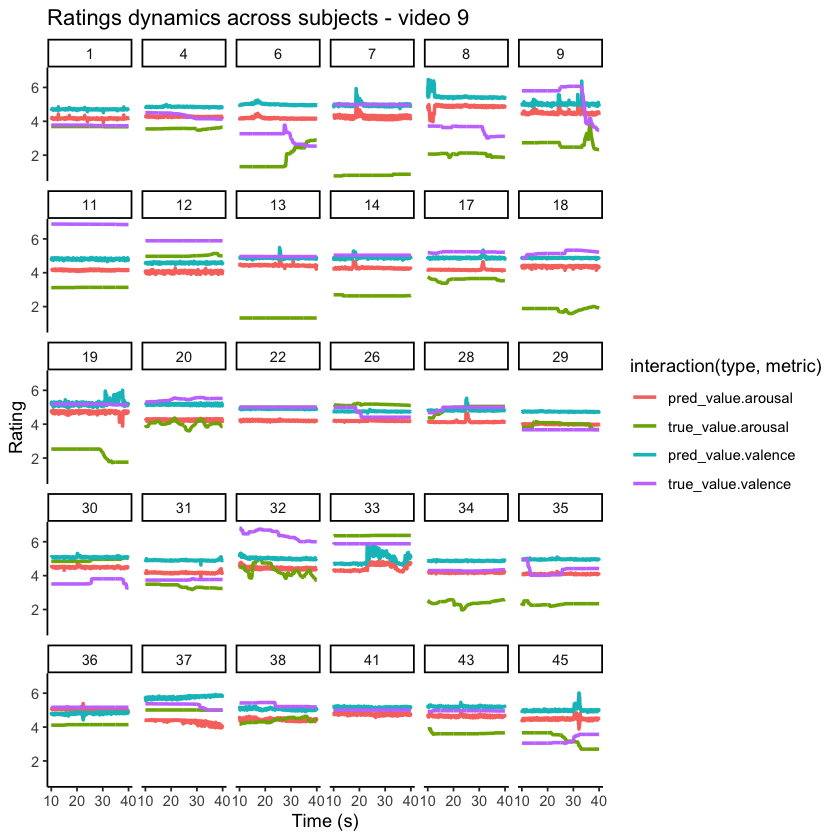

In [43]:
data %>%
    gather(type, value, true_value, pred_value) %>%
    filter(vid == 9) %>%
    ggplot(aes(x=time/1000, y = value, color = interaction(type,metric))) +
        geom_line(size=1) +
        theme_classic() + 
        facet_wrap(~sub) + 
         xlab('Time (s)') +
        ylab('Rating') + 
        ggtitle('Ratings dynamics across subjects - video 9')

ggsave('Plots/pred_eval/vid9.png',dpi=500, width = 10, height = 8)

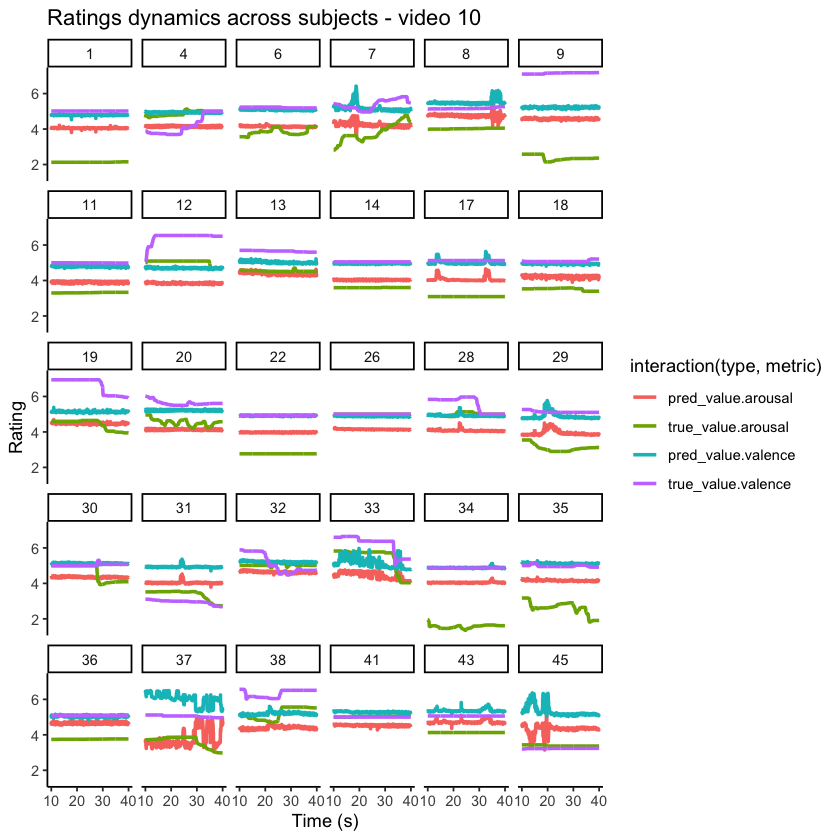

In [44]:
data %>%
    gather(type, value, true_value, pred_value) %>%
    filter(vid == 10) %>%
    ggplot(aes(x=time/1000, y = value, color = interaction(type,metric))) +
        geom_line(size=1) +
        theme_classic() + 
        facet_wrap(~sub) + 
         xlab('Time (s)') +
        ylab('Rating') + 
        ggtitle('Ratings dynamics across subjects - video 10')

ggsave('Plots/pred_eval/vid10.png',dpi=500, width = 10, height = 8)

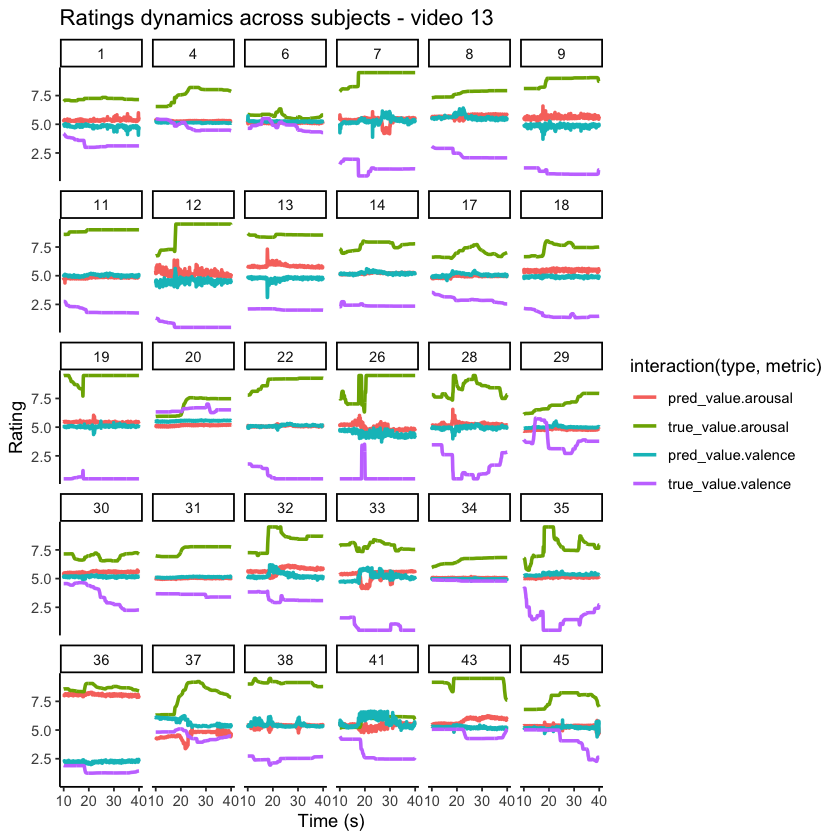

In [45]:
data %>%
    gather(type, value, true_value, pred_value) %>%
    filter(vid == 13) %>%
    ggplot(aes(x=time/1000, y = value, color = interaction(type,metric))) +
        geom_line(size=1) +
        theme_classic() + 
        facet_wrap(~sub) + 
         xlab('Time (s)') +
        ylab('Rating') + 
        ggtitle('Ratings dynamics across subjects - video 13')

ggsave('Plots/pred_eval/vid13.png',dpi=500, width = 10, height = 8)

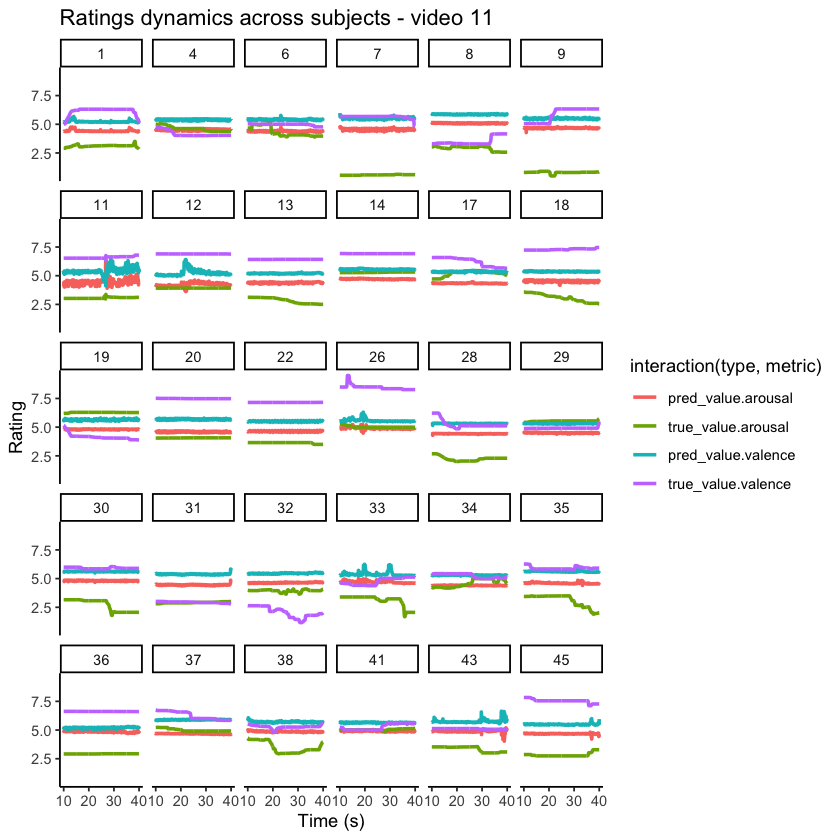

In [46]:
data %>%
    gather(type, value, true_value, pred_value) %>%
    filter(vid == 11) %>%
    ggplot(aes(x=time/1000, y = value, color = interaction(type,metric))) +
        geom_line(size=1) +
        theme_classic() + 
        facet_wrap(~sub) + 
         xlab('Time (s)') +
        ylab('Rating') + 
        ggtitle('Ratings dynamics across subjects - video 11')

ggsave('Plots/pred_eval/vid11.png',dpi=500, width = 10, height = 8)

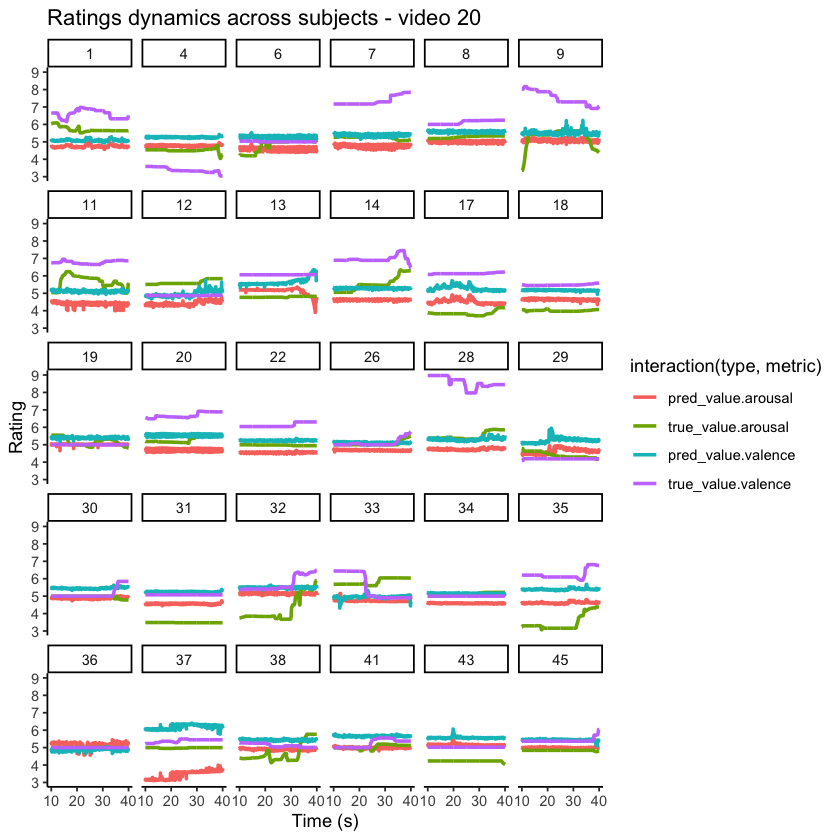

In [47]:
data %>%
    gather(type, value, true_value, pred_value) %>%
    filter(vid == 20) %>%
    ggplot(aes(x=time/1000, y = value, color = interaction(type,metric))) +
        geom_line(size=1) +
        theme_classic() + 
        facet_wrap(~sub) + 
         xlab('Time (s)') +
        ylab('Rating') + 
        ggtitle('Ratings dynamics across subjects - video 20')

ggsave('Plots/pred_eval/vid20.png',dpi=500, width = 10, height = 8)

# 3. Compute correlations between actual and predicted values

In [74]:
# Initialize lists for dataframe
sub_list <- c()
vid_list <- c()
metric_list <- c()
cor_list <- c()
pval_list <- c()

# Initialize correlation dataframw
cor_df <- data %>%
    group_by(sub, vid,metric) %>%
    summarize(cor = n(), p_val = n()+1)

# Loop through subjects, videos and rating type and get correlations
for(sub_ in unique(data$sub)){
    for(vid_ in unique(data$vid)){
        for(metric_ in c('valence','arousal')){
            sub_data <- filter(data, sub == sub_, vid == vid_, metric == metric_)

            sub_list <- c(sub_list,sub_)
            vid_list <- c(vid_list,vid_)
            metric_list <- c(metric_list,metric_)

            cor <- cor.test(sub_data$true_value, sub_data$pred_value)
            
            cor_list <- c(cor_list, as.numeric(cor$estimate))
            pval_list <- c(pval_list, as.numeric(cor$p.value))
            #print(cor)
              
        }
        #break
    }
    #break
}

Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation i

In [76]:
cor_df = data.frame(sub = sub_list,vid = vid_list, metric = metric_list,
              r = cor_list,pval = pval_list)

Warning message:
“Removed 33 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 33 rows containing missing values (geom_point).”
Warning message:
“Removed 33 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 33 rows containing missing values (geom_point).”


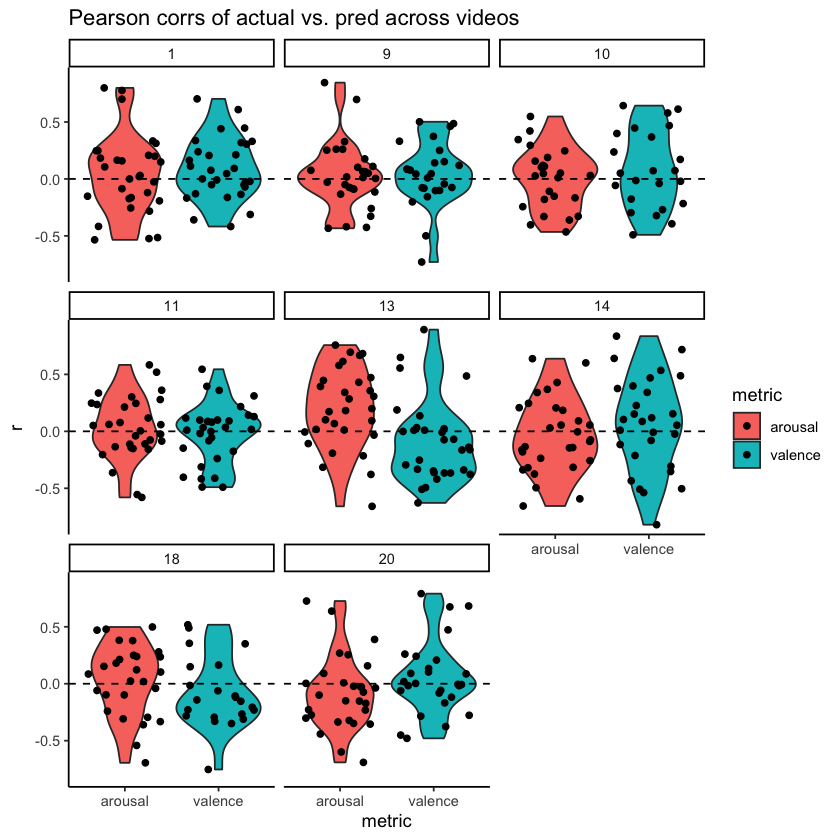

In [97]:
cor_df %>%
    ggplot(aes(x = metric, y = r, fill = metric)) + 
        geom_violin() + geom_jitter() +
        theme_classic() + 
        facet_wrap(~vid) + 
        geom_hline(yintercept = 0, linetype=2) + 
    ggtitle('Pearson corrs of actual vs. pred across videos')

ggsave('Plots/pred_actual_corrs_videos.png',dpi=500, width = 8, height = 8)

Warning message:
“Removed 33 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 33 rows containing missing values (geom_point).”
Warning message:
“Removed 33 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 33 rows containing missing values (geom_point).”


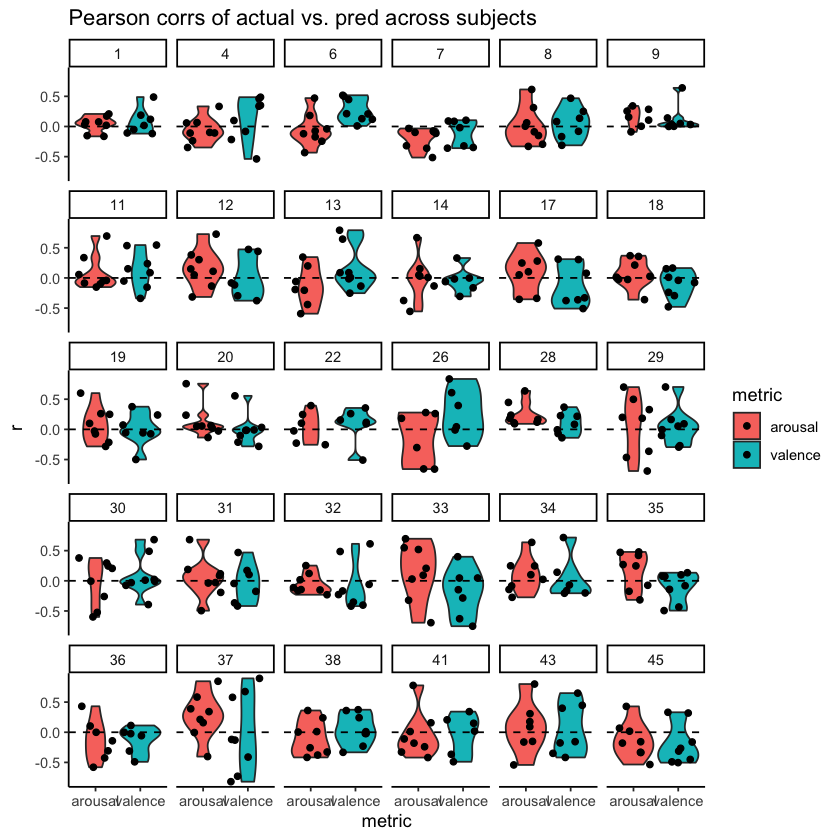

In [98]:
cor_df %>%
    ggplot(aes(x = metric, y = r, fill = metric)) + 
        geom_violin() + geom_jitter() +
        theme_classic() + 
        facet_wrap(~sub) + 
        geom_hline(yintercept = 0, linetype=2) + 
    ggtitle('Pearson corrs of actual vs. pred across subjects')

ggsave('Plots/pred_actual_corrs_subs.png',dpi=500, width = 8, height = 8)

# 4. Plot distributions of ratings per video

## True ratings

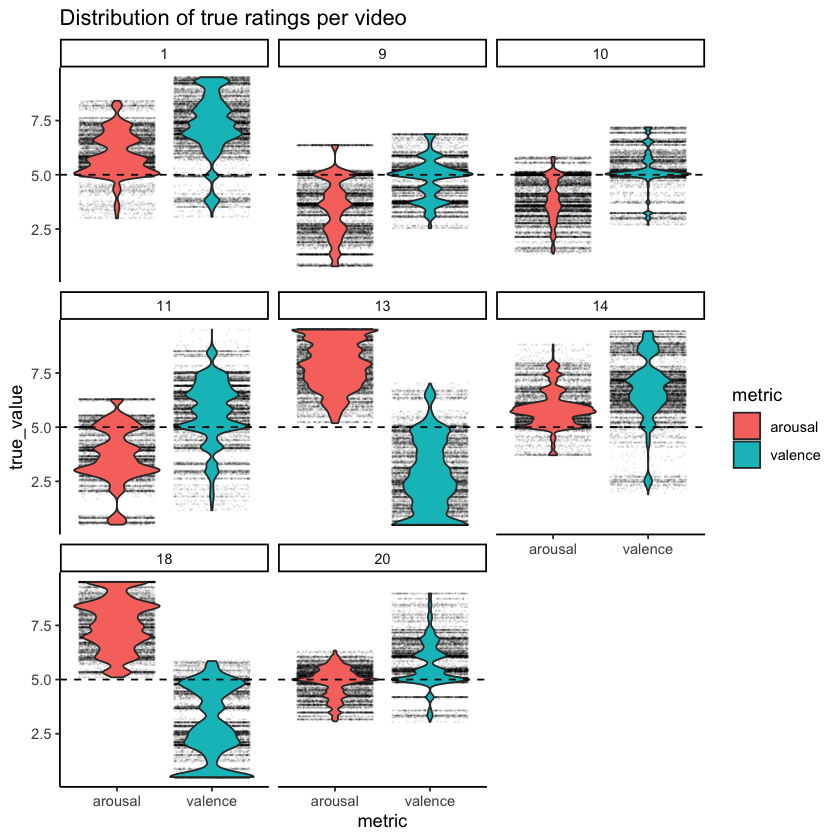

In [93]:
data %>%
    ggplot(aes(x = metric, y = true_value, fill=metric)) + 
        geom_jitter(size = 0.01, alpha = 0.05) + 
        geom_violin() + 
        theme_classic() + 
        facet_wrap(~vid) +
        geom_hline(yintercept = 5, linetype=2) + 
        ggtitle('Distribution of true ratings per video')


ggsave('Plots/true_ratings_video.png',dpi=500, width = 8, height = 8)

## Predicted ratings

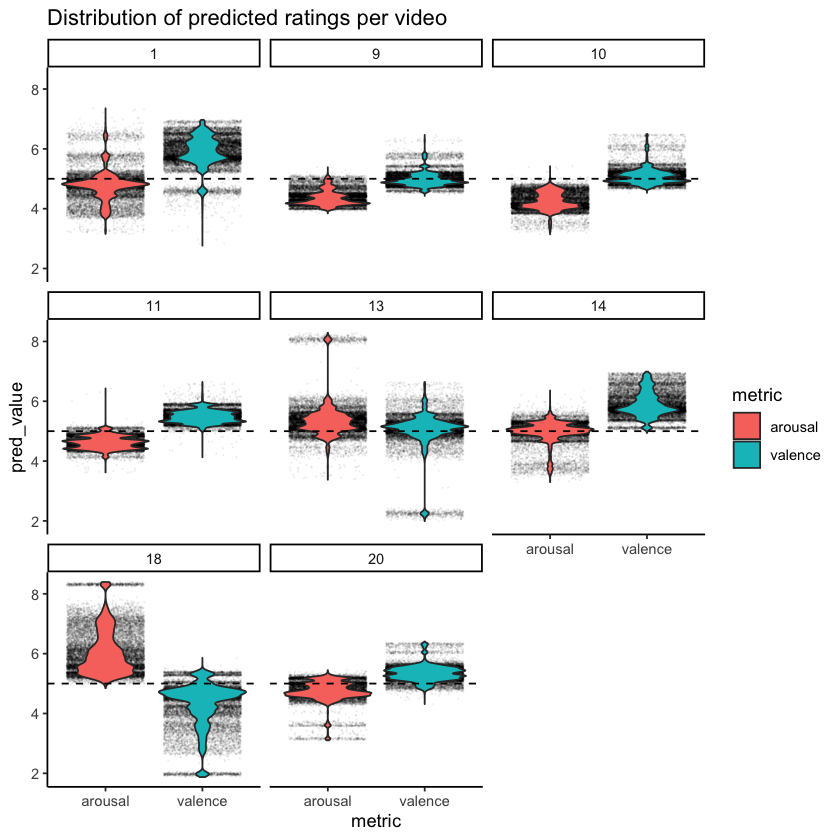

In [94]:
data %>%
    ggplot(aes(x = metric, y = pred_value, fill=metric)) + 
        geom_jitter(size = 0.01, alpha = 0.05) + 
        geom_violin() + 
        theme_classic() + 
        facet_wrap(~vid) + 
        geom_hline(yintercept = 5, linetype=2)  + 
        ggtitle('Distribution of predicted ratings per video')

ggsave('Plots/pred_ratings_video.png',dpi=500, width = 8, height = 8)